<a href="https://colab.research.google.com/github/ju-sants/Exercicios/blob/main/exercicios_gpt_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd

import numpy as np

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [79]:
housing = pd.read_csv('USA_Housing.csv')

In [80]:
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [81]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [82]:
housing.drop('Address', axis=1, inplace=True)

In [83]:
housing['Avg. Area House Age'].tail(20)

,Avg. Area House Age
4980,5.789203
4981,6.150745
4982,5.976507
4983,7.721100
4984,5.071624
4985,6.036275
4986,5.718839
4987,6.237787
4988,7.056673
4989,5.694638


In [84]:
round(housing['Avg. Area House Age']).unique()

array([ 6.,  7.,  5.,  4.,  8.,  9.,  3., 10.])

In [85]:
housing['Faixa_idade_casas'] = pd.cut(housing['Avg. Area House Age'], bins=range(2, 11, 2), labels=[f'{i} -- {i + 1} anos' for i in range(3, 10, 2)])

In [86]:
housing.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Faixa_idade_casas
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,7 -- 8 anos
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,7 -- 8 anos
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,7 -- 8 anos
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,5 -- 6 anos
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,5 -- 6 anos


In [87]:
housing['Faixa_idade_casas'].unique()

['5 -- 6 anos', '7 -- 8 anos', '9 -- 10 anos', '3 -- 4 anos']
Categories (4, object): ['3 -- 4 anos' < '5 -- 6 anos' < '7 -- 8 anos' < '9 -- 10 anos']

In [88]:
fig = px.scatter(housing, x='Avg. Area Income', y='Price', color='Faixa_idade_casas')
fig.update_layout(legend_title_text='Faixa Etária das Casas')

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



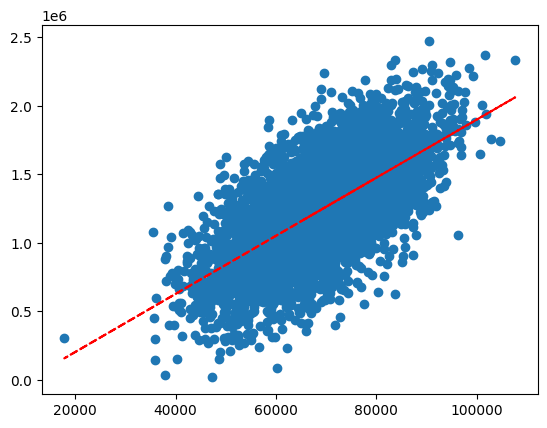

In [89]:
plt.scatter(housing['Avg. Area Income'], housing['Price'])

coef = np.polyfit(housing['Avg. Area Income'], housing['Price'], 1)
trendline = np.polyval(coef, housing['Avg. Area Income'])

plt.plot(housing['Avg. Area Income'], trendline, color='red', linestyle='--', label='TrendLine')



In [90]:
housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price',
       'Faixa_idade_casas'],
      dtype='object')

In [91]:
def metricas(df_oringin):
  import pandas as pd

  df = df_oringin.copy()

  for k, v in dict(df.dtypes).items():
      if not v == 'float64' or v == 'int64':
        df.drop(columns=[k], inplace=True)

  metricas = pd.DataFrame({
      'Média': df.mean(),
      'Mediana': df.median(),
      'Desvio padrão': df.std(),
      'Max': df.max(),
        'Min': df.min(),
      '25%': df.quantile(0.25),
        '50%': df.quantile(0.5),
        '75%': df.quantile(0.75)})
  return metricas.T

metricas(housing)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Média,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
Mediana,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
Desvio padrão,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
Max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06
Min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06


In [92]:
bins = range(0, 11, 5)
labels = [f'{i} -- {i + 5}' for i in range(1, 10, 5)]

housing['Faixa_Etaria_Casas'] = pd.cut(housing['Avg. Area House Age'], bins=bins, labels=labels)
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Faixa_idade_casas,Faixa_Etaria_Casas
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,5 -- 6 anos,6 -- 11
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,7 -- 8 anos,6 -- 11
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,5 -- 6 anos,6 -- 11
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,7 -- 8 anos,6 -- 11
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,5 -- 6 anos,6 -- 11


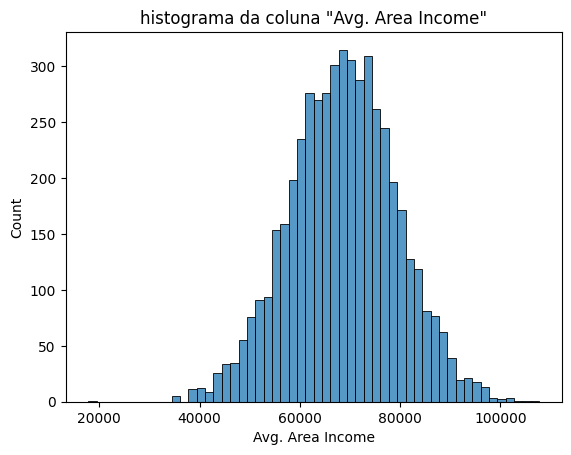

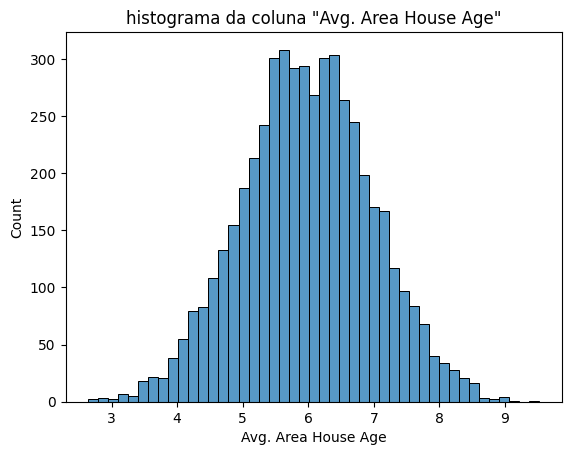

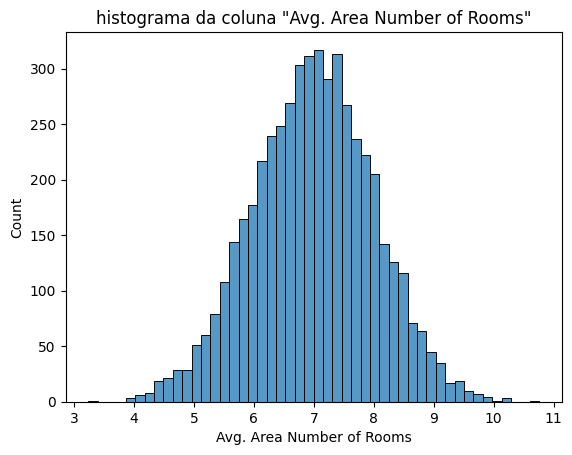

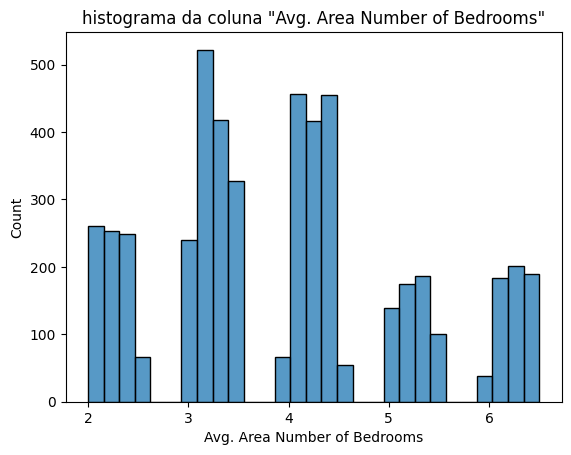

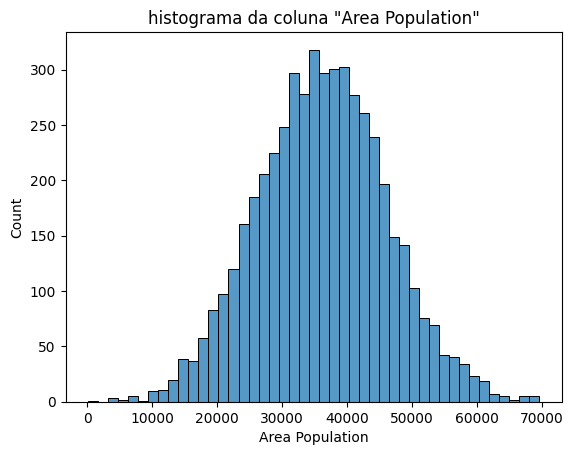

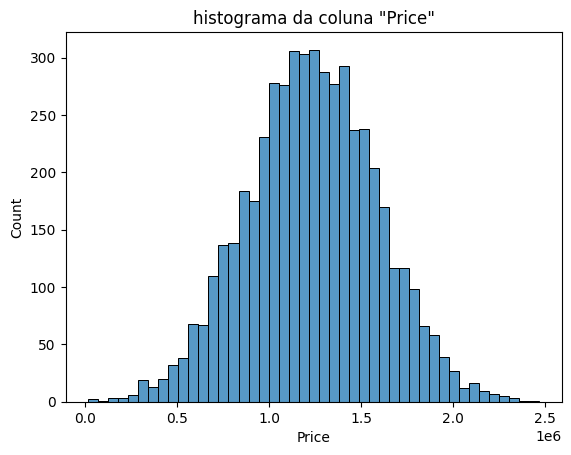

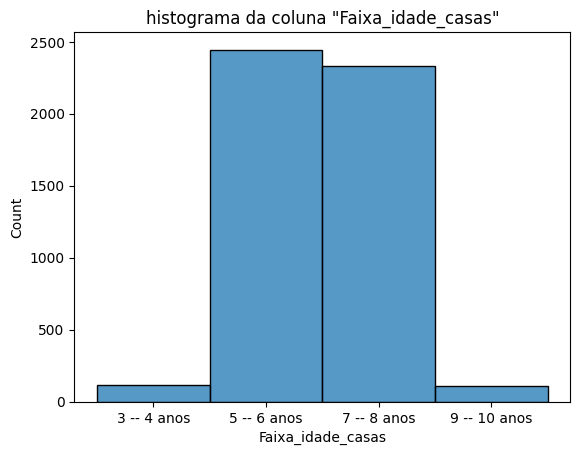

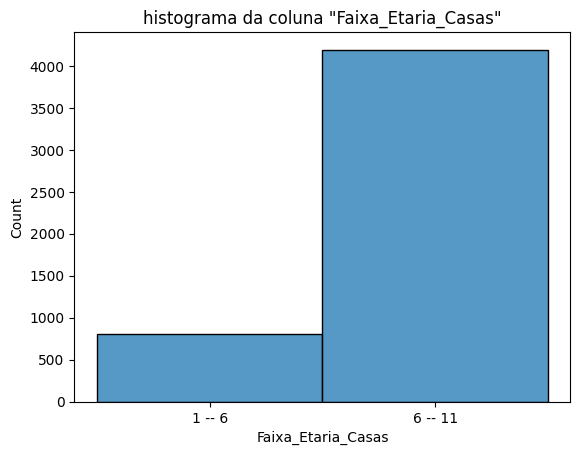

In [102]:
for col in housing.columns:
  sns.histplot(housing, x=f'{col}')
  plt.title(f'histograma da coluna "{col}"')
  plt.show()

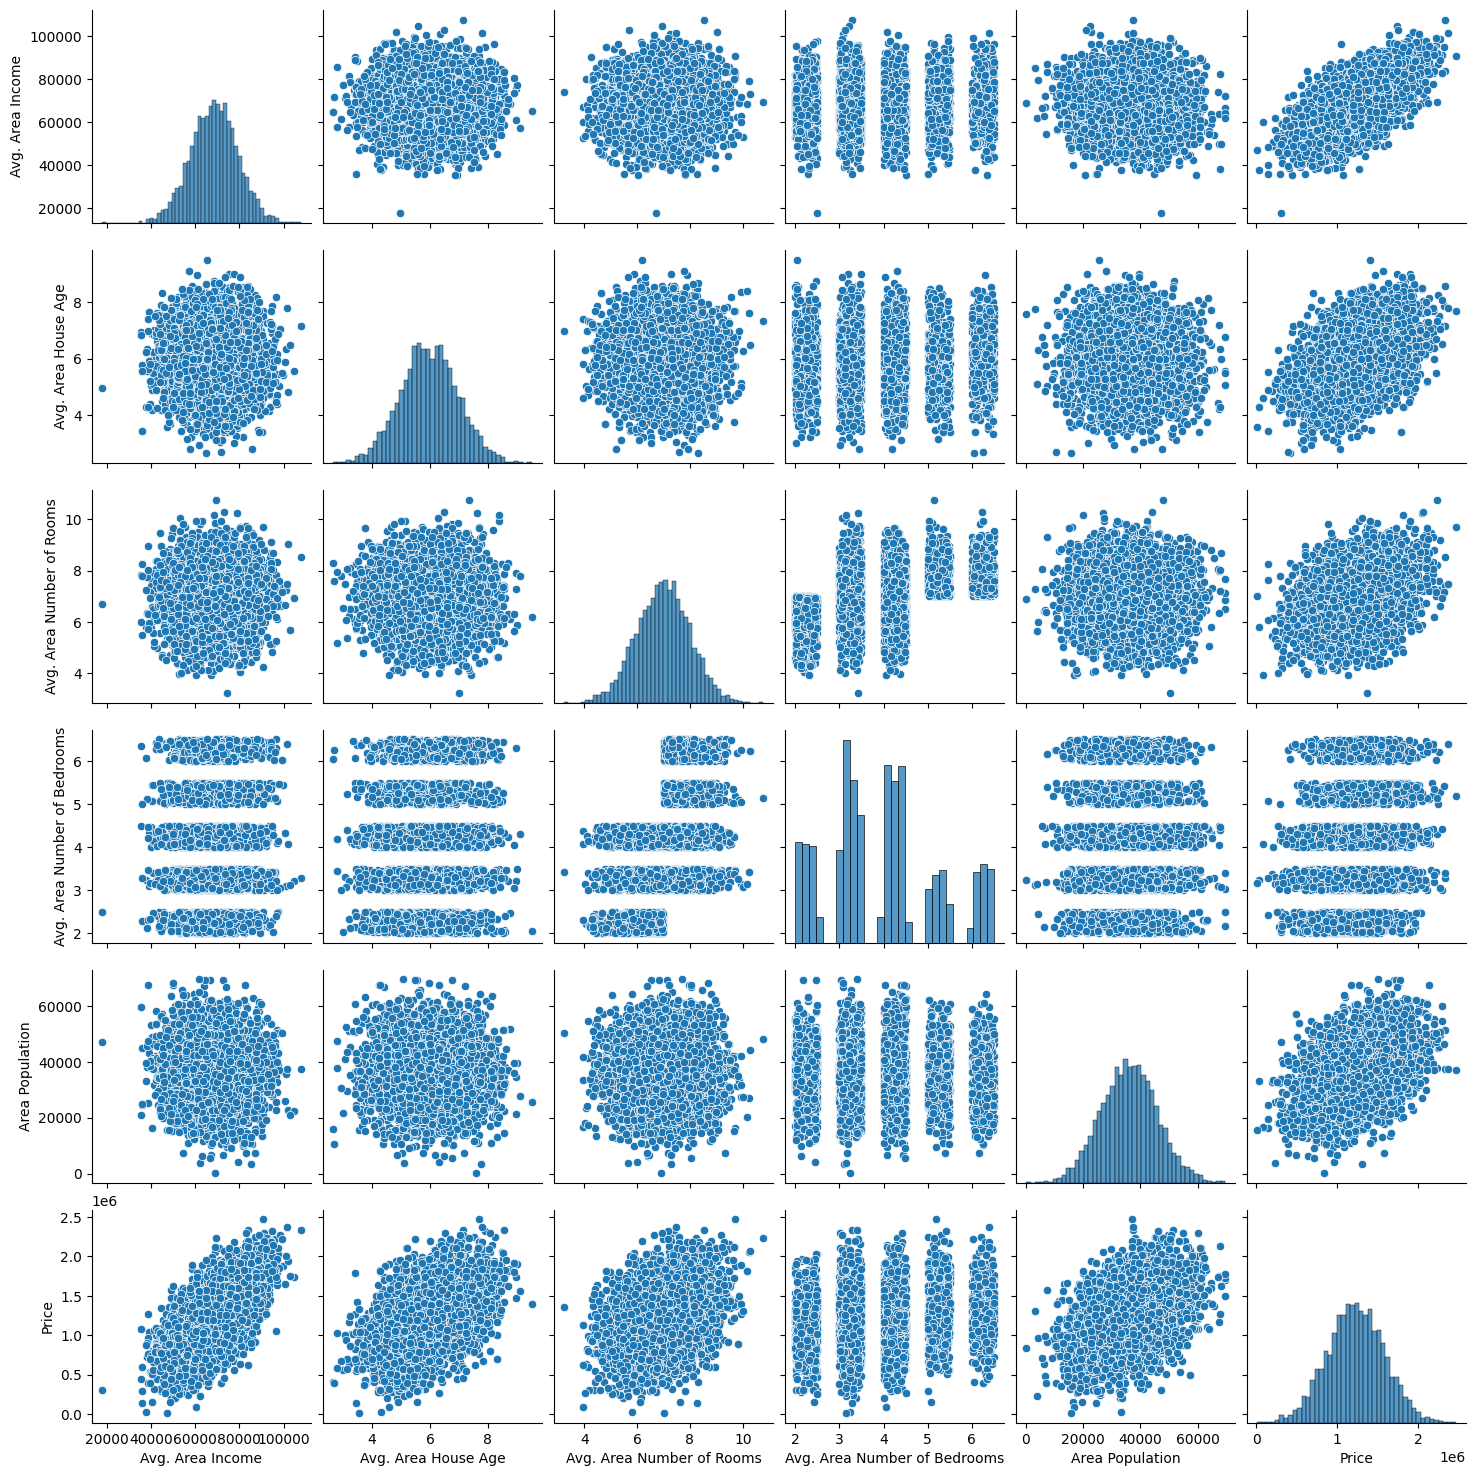

In [103]:
sns.pairplot(housing)